In [1]:
%cd ..

import os
import json
import yaml
from tqdm.notebook import tqdm

import cv2 
import numpy as np 
from matplotlib import pyplot as plt
from modules.preprocessing import segment_image

%matplotlib inline

/Users/kx/Docs/git_calligraphy_ocr/chinese-calligraphy-ocr


In [2]:
config_path = 'config.yaml'
with open(config_path) as file:
    config = yaml.safe_load(file)['dataset']

In [3]:
def show(imgs, col=5):
    row = max((len(imgs) + col - 1) // col, 2)
    plt.figure(figsize=(col * 2.5, row * 2))
    
    for i in range(len(imgs)):
        ax = plt.subplot(row, col, i + 1)
        plt.imshow(cv2.cvtColor(imgs[i], cv2.COLOR_BGR2RGB).astype("uint8"))
        plt.axis("off")

In [4]:
chars = os.listdir(config['raw_dir'])
if '.DS_Store' in chars:
    chars.remove('.DS_Store')

In [7]:
for char in chars:
    char_path = os.path.join(config['raw_dir'], char)
    
    path = os.path.join(config['clean_dir'], char)
    if not os.path.exists(path):
        os.mkdir(path)

    imgs = []
    segmenteds = []
    for file in tqdm(os.listdir(char_path)):
        if file != '.DS_Store':
            path = os.path.join(char_path, file)
            image = cv2.imread(path)

            path = os.path.join(config['clean_dir'], char, file)
            if not os.path.exists(path):
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                imgs.append(gray)

                blur = cv2.GaussianBlur(gray, (9, 9), 0)
                segmented = segment_image(blur)
                segmenteds.append(segmented)
                cv2.imwrite(path, segmented)

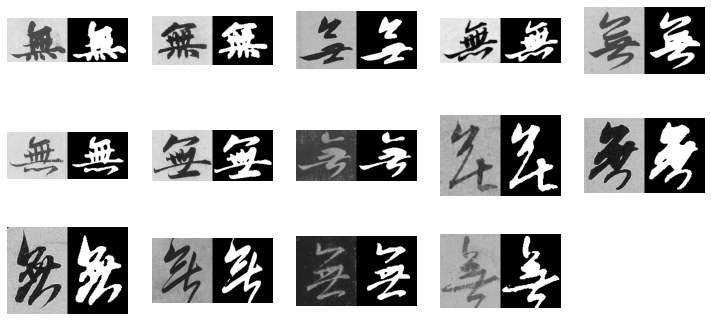

In [6]:
concated = [np.concatenate((x, y), axis = 1) for x, y in zip(imgs, segmenteds)]
show(concated)